In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
tips.shape

(244, 7)

In [61]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [62]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<Axes: xlabel='sex', ylabel='count'>

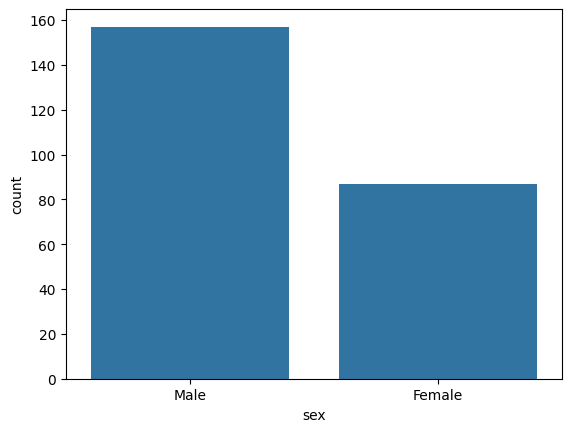

In [63]:
sns.countplot(x='sex',data=tips)

<Axes: xlabel='tip', ylabel='Count'>

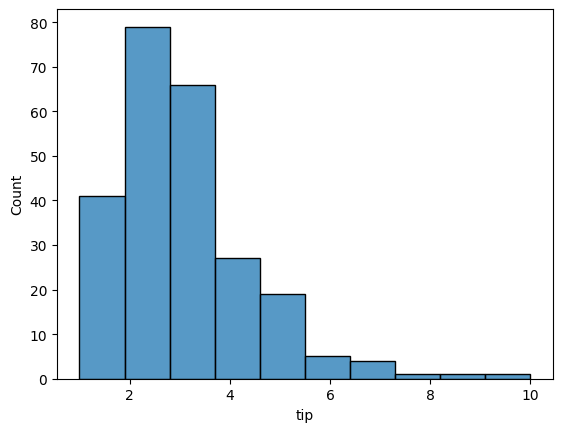

In [64]:
sns.histplot(x='tip',kde=False,bins=10,data=tips)

<Axes: >

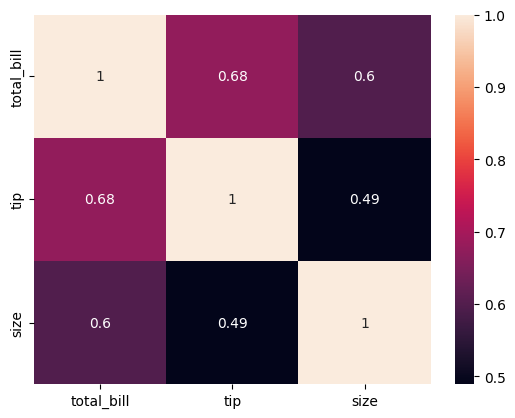

In [65]:
corr=tips.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=tips.drop('tip',axis=1)
y=tips['tip']

In [67]:
X=pd.get_dummies(X,drop_first=True,dtype=int)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [68]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [69]:
# from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm


# 4. Building Multiple Linear Regression Model
print("\nBuilding and training Multiple Linear Regression model...")
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lin = lin_reg.predict(X_test)

# Print the coefficients and intercept
print("\nLinear Regression Coefficients:")
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

# Match coefficients to the feature names
for feature, coef in zip(X.columns, lin_reg.coef_):
    print(f"{feature}: {coef}")

print("\nMultiple Linear Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lin)}")


# Predictions and evaluation
# y_pred_lin = lin_reg.predict(X_test)
# print("\nMultiple Linear Regression Performance:")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lin)}")


# 5. Polynomial Regression
print("\nBuilding Polynomial Regression model...")
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions and evaluation
y_pred_poly = poly_reg.predict(X_test_poly)
print("\nPolynomial Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_poly)}")


# 6. Lasso Regression
print("\nBuilding Lasso Regression model...")
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lasso = lasso.predict(X_test)
print("\nLasso Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso)}")


# 7. Ridge Regression
print("\nBuilding Ridge Regression model...")
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred_ridge = ridge.predict(X_test)
print("\nRidge Regression Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge)}")


# 8. Random Forest Regressor
print("\nBuilding Random Forest Regressor model...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")


# 9. SVM Regressor
print("\nBuilding Support Vector Regressor (SVM) model...")
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm_reg.predict(X_test)
print("\nSVM Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_svm)}")


# 10. Decision Tree Regressor
print("\nBuilding Decision Tree Regressor model...")
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tree = tree_reg.predict(X_test)
print("\nDecision Tree Regressor Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_tree)}")



# Building Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train, y_train)

# Predictions and evaluation
y_pred_elastic = elastic_net.predict(X_test)

print("\nElastic Net Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_elastic)}")




# 11. Model Evaluation Metrics Comparison (MAE)
print("\nComparing Models' Performance:")
models = ['Linear Regression', 'Polynomial Regression', 'Lasso', 'Ridge', 'Elastic Net', 'Random Forest', 'SVM', 'Decision Tree']
mae_values = [
    mean_absolute_error(y_test, y_pred_lin),
    mean_absolute_error(y_test, y_pred_poly),
    mean_absolute_error(y_test, y_pred_lasso),
    mean_absolute_error(y_test, y_pred_ridge),
    mean_absolute_error(y_test, y_pred_elastic),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_svm),
    mean_absolute_error(y_test, y_pred_tree)
]



for model, mae in zip(models, mae_values):
    print(f"{model} - MAE: {mae:.2f}")



Building and training Multiple Linear Regression model...

Linear Regression Coefficients:
Intercept: 3.088941176470588
Coefficients: [ 0.87312999  0.2539859  -0.03454708  0.14698166  0.07149221  0.05267251
  0.02482893 -0.08339175]
total_bill: 0.8731299902300581
size: 0.25398590031564827
sex_Female: -0.0345470816353645
smoker_No: 0.14698166431557655
day_Fri: 0.07149221379052279
day_Sat: 0.05267251492254868
day_Sun: 0.024828933129249595
time_Dinner: -0.08339175052107142

Multiple Linear Regression Performance:
Mean Absolute Error: 0.7171821289867384

Building Polynomial Regression model...

Polynomial Regression Performance:
Mean Absolute Error: 0.7996994101034628

Building Lasso Regression model...

Lasso Regression Performance:
Mean Absolute Error: 1.0083052464228934

Building Ridge Regression model...

Ridge Regression Performance:
Mean Absolute Error: 0.7166760681181916

Building Random Forest Regressor model...

Random Forest Regressor Performance:
Mean Absolute Error: 0.76850675